In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = r'/Users/macbook/Masked_NonMasked-images'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [3]:
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    if not i.startswith('.'): # To ignore .DS_Store file in macOS
            CATEGORIES.append(i)
    
# CATEGORIES.remove('.DS_Store')
print(CATEGORIES)

['with_mask', 'without_mask']


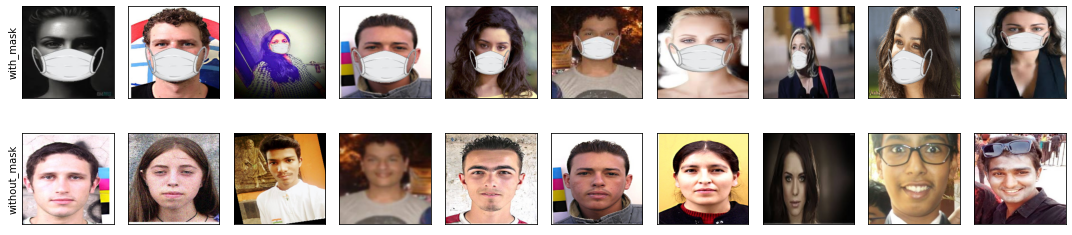

In [4]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [5]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        if not img.startswith('.'): # To ignore .DS_Store file in macOS
            try:
                img_array = cv2.imread(os.path.join(path, img))   # read the image
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
                training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
            except WException as e:
                pass
        
print(len(training_data))

100%|██████████████████████████████████████████████████| 467/467 [00:01<00:00, 280.33it/s]

973


In [6]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c)
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        if not img.startswith('.'): # To ignore .DS_Store file in macOS
            try:
                img_array = cv2.imread(os.path.join(path, img))   
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                valid_data.append([img_resized, class_num])
            except WException as e:
                pass
        
print(len(valid_data))

100%|██████████████████████████████████████████████████| 121/121 [00:00<00:00, 290.97it/s]

240


In [7]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c)
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        if not img.startswith('.'): # To ignore .DS_Store file in macOS
            try:
                img_array = cv2.imread(os.path.join(path, img))   
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                test_data.append([img_resized, class_num])
            except WException as e:
                pass
        
print(len(test_data))

100%|██████████████████████████████████████████████████| 101/101 [00:00<00:00, 285.83it/s]

200


In [8]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [9]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (973, 227, 227, 3) Y_train= (973,)


In [10]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (240, 227, 227, 3) Y_valid= (240,)


In [11]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (200, 227, 227, 3) Y_test= (200,)


In [12]:
pickle_out = open(r"/Users/macbook/Masked_NonMasked-images/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open(r"/Users/macbook/Masked_NonMasked-images/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open(r"/Users/macbook/Masked_NonMasked-images/X_valid.pickle","wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open(r"/Users/macbook/Masked_NonMasked-images/Y_valid.pickle","wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open(r"/Users/macbook/Masked_NonMasked-images/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open(r"/Users/macbook/Masked_NonMasked-images/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [14]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
# tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 0


In [15]:
pickle_in = open(r"/Users/macbook/Masked_NonMasked-images/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open(r"/Users/macbook/Masked_NonMasked-images/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open(r"/Users/macbook/Masked_NonMasked-images/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open(r"/Users/macbook/Masked_NonMasked-images/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open(r"/Users/macbook/Masked_NonMasked-images/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open(r"/Users/macbook/Masked_NonMasked-images/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (973, 227, 227, 3) Y_train= (973,)
X_valid= (240, 227, 227, 3) Y_valid= (240,)
X_test= (200, 227, 227, 3) Y_test= (200,)


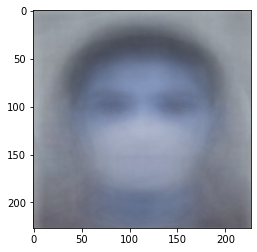

In [16]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [17]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

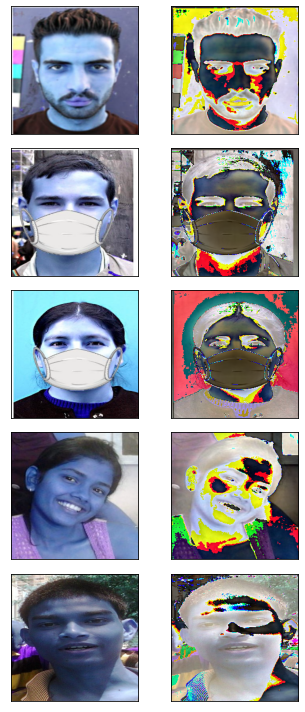

In [18]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [19]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

2022-03-30 00:56:20.426686: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [20]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
model.save("Face_Mask_Detection_Model.h5")

In [21]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Epoch 1/20
31/31 [==============================] - 122s 4s/step - loss: 1.0799 - accuracy: 0.5149 - val_loss: 24.4111 - val_accuracy: 0.7042
Epoch 2/20
31/31 [==============================] - 138s 4s/step - loss: 0.2149 - accuracy: 0.5180 - val_loss: 2.0818 - val_accuracy: 0.5208
Epoch 3/20
31/31 [==============================] - 133s 4s/step - loss: 0.1592 - accuracy: 0.5159 - val_loss: 2.1842 - val_accuracy: 0.6375
Epoch 4/20
31/31 [==============================] - 100s 3s/step - loss: 0.1061 - accuracy: 0.5139 - val_loss: 0.3679 - val_accuracy: 0.5458
Epoch 5/20
31/31 [==============================] - 91s 3s/step - loss: 0.1102 - accuracy: 0.5180 - val_loss: 0.3574 - val_accuracy: 0.5417
Epoch 6/20
31/31 [==============================] - 95s 3s/step - loss: 0.0489 - accuracy: 0.5159 - val_loss: 0.1872 - val_accuracy: 0.5292
Epoch 7/20
31/31 [==============================] - 123s 4s/step - loss: 0.0739 - accuracy: 0.5180 - val_loss: 0.4231 - val_accuracy: 0.5000
Epoch 8/20
31/

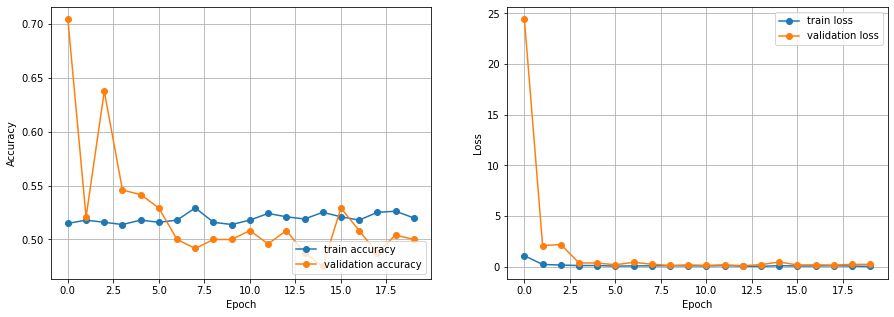

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [23]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

7/7 [==============================] - 4s 501ms/step - loss: 4.3249 - accuracy: 0.1850

Test Accuracy: 0.1850000023841858

Test Loss: 4.324856758117676


In [1]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

cascPath = os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
model = load_model('Face_Mask_Detection_Model.h5', compile = False)

video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(227, 227), flags=cv2.CASCADE_SCALE_IMAGE)
    faces_list=[]
    preds=[]
    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h,x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (227, 227))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame = preprocess_input(face_frame)
        faces_list.append(face_frame)
        if len(faces_list)>0:
            preds = model.predict(faces_list)
        for pred in preds:
            (mask, withoutMask) = pred
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(frame, label, (x, y- 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h),color, 2)
        
    # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video_capture.release()
cv2.destroyAllWindows()

2022-03-30 15:47:08.834026: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 